## 1K  plots

In [19]:
from df_utils import load_df
from crawl_ids import CrawlRokuTop1K
import matplotlib.pyplot as plt
import seaborn as sns

## Load Roku TCP connection data from Roku 1K crawl

In [21]:
roku_tcp = load_df(CrawlRokuTop1K, "tcp_conn")

### Channels with playback

In [22]:
playback = roku_tcp[roku_tcp.playback]
playback.channel_id.nunique(), roku_tcp.channel_id.nunique()

(677, 1000)

### Take channels from the top ten categories

In [24]:
playback.drop_duplicates("channel_id").category.value_counts().head(10)

News & Weather      175
Movies & TV         131
Kids & Family        68
Religious            64
Games                47
Special Interest     32
Lifestyle            22
Music                22
Sports               21
International        18
Name: category, dtype: int64

In [6]:
top_ten_categories = list(playback.drop_duplicates("channel_id").category.value_counts().head(10).index)
roku_top_ten_categories = list(roku_tcp.drop_duplicates("channel_id").category.value_counts().head(10).index)

In [25]:
playback_top_ten = playback[playback.category.isin(top_ten_categories)]
roku_top_ten = roku_tcp[roku_tcp.category.isin(top_ten_categories)]
len(playback_top_ten), len(roku_top_ten)

(35057, 54580)

### Adblocked connections

In [8]:
playback_top_ten.adblocked.value_counts()

False    27003
True      8054
Name: adblocked, dtype: int64

In [27]:
playback_top_ten_blocked = playback_top_ten[playback_top_ten.adblocked]
roku_top_ten_blocked = roku_top_ten[roku_top_ten.adblocked]

### Groupby - Number of trackers per channel

In [37]:
playback_grouped = playback_top_ten_blocked.drop_duplicates(subset=["channel_name", "domain"]).\
    groupby(["channel_id", "category", "rank"]).size().reset_index(name="# tracker domains").\
    sort_values(by=['# tracker domains'], ascending=False)

roku_grouped = roku_top_ten_blocked.drop_duplicates(subset=["channel_name", "domain"]).\
    groupby(["channel_id", "category", "rank", "playback"]).size().reset_index(name="# tracker domains").\
    sort_values(by=['# tracker domains'], ascending=False)


### Num of tracker domains in channels with video playback

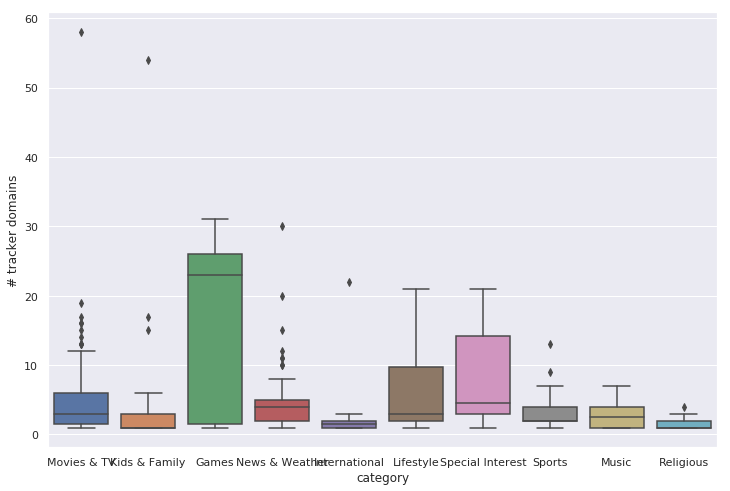

In [53]:
sns.set(rc={'figure.figsize':(12,8)}, style="darkgrid")
sns.set(font_scale = 1)
ax = sns.boxplot(x="category", y="# tracker domains", data=playback_grouped)
plt.savefig('playback_category_n_tracker_domains_boxplot.pdf')

In [ ]:
sns.set(rc={'figure.figsize':(12,8)}, style="darkgrid")
sns.set(font_scale = 1)
ax = sns.boxplot(x="category", y="# tracker domains", data=playback_grouped)

### Num of tracker domains by category and channel rank (only channels with video playback)

(0, 32.0)

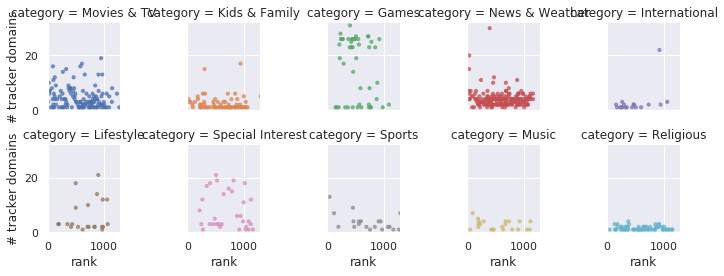

In [50]:
g = sns.FacetGrid(playback_grouped, col="category", col_wrap=5, height=2, hue="category")
g.map(plt.scatter, "rank", "# tracker domains", alpha=.7, sizes=(10, 10))
plt.xlim(0, df['rank'].quantile(0.99))  # set x lim to 99th quantile
plt.ylim(0, df['# tracker domains'].quantile(0.99)+5)  # set x lim to 99th quantile
#plt.ylim(0, 30)  # set x lim to 99th quantile

### Num of tracker domains by category and channel rank (all channels regardless of playback detection)

(0, 32.0)

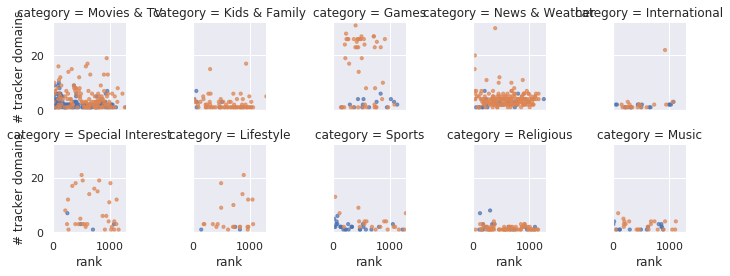

In [51]:
g = sns.FacetGrid(roku_grouped, col="category", col_wrap=5, height=2, hue="playback")
g.map(plt.scatter, "rank", "# tracker domains", alpha=.7, sizes=(10, 10))
plt.xlim(0, df['rank'].quantile(0.99))  # set x lim to 99th quantile
plt.ylim(0, df['# tracker domains'].quantile(0.99)+5)  # set x lim to 99th quantile


### Num of tracker domains by rank
- mention no correlation, don't use the plots

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 32.0)

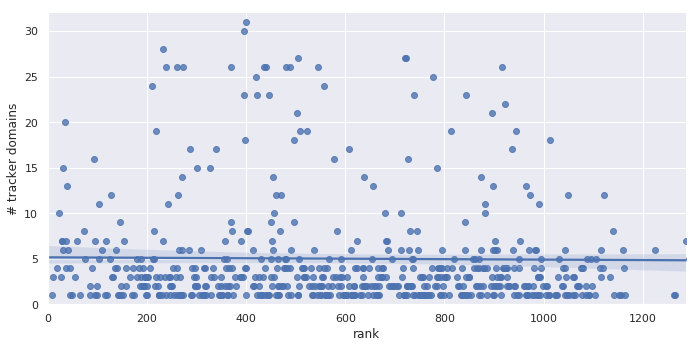

In [59]:
df = playback_grouped
sns.lmplot(x="rank", y="# tracker domains", data=df, size=5, aspect=2)
plt.xlim(0, df['rank'].quantile(0.99))  # set x lim to 99th quantile
plt.ylim(0, df['# tracker domains'].quantile(0.99)+5)  # set x lim to 99th quantile

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 31.0)

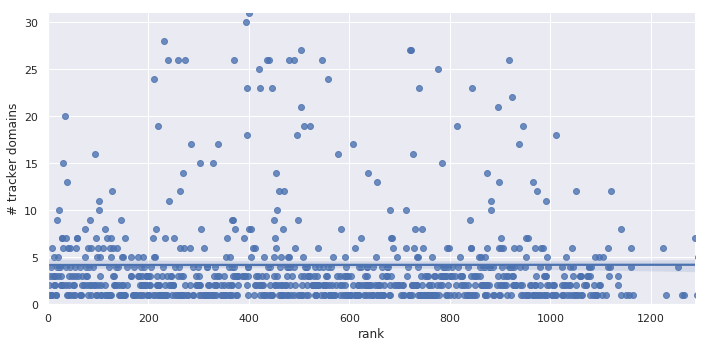

In [60]:
df = roku_grouped
sns.lmplot(x="rank", y="# tracker domains", data=df, size=5, aspect=2)
plt.xlim(0, df['rank'].quantile(0.99))  # set x lim to 99th quantile
plt.ylim(0, df['# tracker domains'].quantile(0.99)+5)  # set x lim to 99th quantile